### Set path

In [1]:
PROJECT_PATH = 'C:/Users/micha/projects/oscillation_vs_exponent/'

## Set-up

### Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [3]:
import sys
sys.path.append(f"{PROJECT_PATH}/code")
from bootstrap import run_hierarchical_bootstrap


### Settings

In [4]:
N_ITERATIONS = 1000 # number of iterations for bootstrapping
VAR = 'exponent' # variable to analyze

### functions

## Main

### load specparam results

In [5]:
# load spectral parameterization results
results = pd.read_csv(f"{PROJECT_PATH}/data/results/spectral_parameters.csv", index_col=0)

# log-transform power valies
results['alpha_bp'] = np.log10(results['alpha_bp'])
results['alpha_adj'] = np.log10(results['alpha_adj'])

# show
print(results.shape)
print(len(results)/8)
results.head()

c:\Users\micha\anaconda3\envs\tilt_vs_fingerprint\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(5560, 19)
695.0


,patient,chan_idx,label,pos_y,pos_x,pos_z,unique_id,material,memory,epoch,offset,knee,exponent,f_rotation,alpha_cf,alpha_pw,alpha_bw,alpha_bp,alpha_adj
0,pat02,0,A01-A02,-65.43100,61.94490,3.55955,pat02_0,words,hit,prestim,8.451107,12.903272,3.542673,10.978558,NaN,NaN,NaN,4.443699,3.753137
1,pat02,1,A02-A03,-70.93895,57.17765,12.15540,pat02_1,words,hit,prestim,7.595982,12.332651,3.052480,83.836257,10.839096,0.210785,2.000000,4.159722,3.469575
2,pat02,2,A03-A04,-75.39550,51.39440,20.94335,pat02_2,words,hit,prestim,7.056773,8.787521,2.774045,89.824561,12.850783,0.276397,2.000000,4.178573,3.630406
3,pat02,3,A04-A05,-78.91950,43.90980,30.13485,pat02_3,words,hit,prestim,7.595080,10.177476,2.940543,59.883041,NaN,NaN,NaN,4.374244,3.435538
4,pat02,4,A05-A06,-80.96735,35.21485,38.13475,pat02_4,words,hit,prestim,7.399935,9.126477,2.872949,65.871345,11.565201,0.227912,2.671217,4.337301,3.551039


In [6]:
# get results for task-modulated channels only

# load task-modulated channel info
task_modulated_channels = pd.read_csv(f"{PROJECT_PATH}/data/results/ieeg_modulated_channels.csv", index_col=0)

# join info with results
df_merge = pd.merge(results, task_modulated_channels, on=['patient','chan_idx','material','memory'])

# get task-modulated channel results only
results = df_merge.loc[df_merge['sig']]
results

,patient,chan_idx,label,pos_y,pos_x,pos_z,unique_id,material,memory,epoch,...,f_rotation,alpha_cf,alpha_pw,alpha_bw,alpha_bp,alpha_adj,p_val,sign,sig_tm,sig
2,pat02,1,A02-A03,-70.93895,57.17765,12.15540,pat02_1,words,hit,prestim,...,83.836257,10.839096,0.210785,2.000000,4.159722,3.469575,0.0460,-1,True,True
3,pat02,1,A02-A03,-70.93895,57.17765,12.15540,pat02_1,words,hit,poststim,...,83.836257,NaN,NaN,NaN,4.232238,3.273479,0.0460,-1,True,True
8,pat02,4,A05-A06,-80.96735,35.21485,38.13475,pat02_4,words,hit,prestim,...,65.871345,11.565201,0.227912,2.671217,4.337301,3.551039,0.0000,1,True,True
9,pat02,4,A05-A06,-80.96735,35.21485,38.13475,pat02_4,words,hit,poststim,...,65.871345,NaN,NaN,NaN,4.119485,NaN,0.0000,1,True,True
18,pat04,0,A01-A09,-58.30120,52.43075,-26.23685,pat04_0,words,hit,prestim,...,36.927875,9.468345,0.655227,2.200840,5.168442,4.966689,0.0012,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,pat22,25,PI_05-PI_06,-10.50000,-40.00000,32.50000,pat22_25,faces,miss,poststim,...,NaN,7.303599,0.441313,2.000000,3.371628,2.339238,0.0286,-1,True,True
5324,pat22,29,PI_09-PI_10,-11.50000,-41.00000,60.50000,pat22_29,faces,miss,prestim,...,55.890838,NaN,NaN,NaN,4.316152,3.116804,0.3236,-1,False,True
5325,pat22,29,PI_09-PI_10,-11.50000,-41.00000,60.50000,pat22_29,faces,miss,poststim,...,55.890838,NaN,NaN,NaN,4.385591,NaN,0.3236,-1,False,True
5368,pat22,51,MOF_08-MOF_09,48.00000,-14.00000,23.50000,pat22_51,faces,miss,prestim,...,43.914230,NaN,NaN,NaN,3.583183,NaN,0.0006,-1,True,True


In [7]:
# split results by trial type (words/faces) and take successful trials only (memory==hit)
df_w = results.loc[((results['memory']=='hit')&(results['material']=='words'))]
df_f = results.loc[((results['memory']=='hit')&(results['material']=='faces'))]
df_w

,patient,chan_idx,label,pos_y,pos_x,pos_z,unique_id,material,memory,epoch,...,f_rotation,alpha_cf,alpha_pw,alpha_bw,alpha_bp,alpha_adj,p_val,sign,sig_tm,sig
2,pat02,1,A02-A03,-70.93895,57.17765,12.15540,pat02_1,words,hit,prestim,...,83.836257,10.839096,0.210785,2.000000,4.159722,3.469575,0.0460,-1,True,True
3,pat02,1,A02-A03,-70.93895,57.17765,12.15540,pat02_1,words,hit,poststim,...,83.836257,NaN,NaN,NaN,4.232238,3.273479,0.0460,-1,True,True
8,pat02,4,A05-A06,-80.96735,35.21485,38.13475,pat02_4,words,hit,prestim,...,65.871345,11.565201,0.227912,2.671217,4.337301,3.551039,0.0000,1,True,True
9,pat02,4,A05-A06,-80.96735,35.21485,38.13475,pat02_4,words,hit,poststim,...,65.871345,NaN,NaN,NaN,4.119485,NaN,0.0000,1,True,True
18,pat04,0,A01-A09,-58.30120,52.43075,-26.23685,pat04_0,words,hit,prestim,...,36.927875,9.468345,0.655227,2.200840,5.168442,4.966689,0.0012,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,pat22,25,PI_05-PI_06,-10.50000,-40.00000,32.50000,pat22_25,words,hit,poststim,...,72.857700,NaN,NaN,NaN,3.528158,2.005179,0.0014,-1,True,True
1288,pat22,29,PI_09-PI_10,-11.50000,-41.00000,60.50000,pat22_29,words,hit,prestim,...,64.873294,NaN,NaN,NaN,4.436776,3.452392,0.0090,-1,True,True
1289,pat22,29,PI_09-PI_10,-11.50000,-41.00000,60.50000,pat22_29,words,hit,poststim,...,64.873294,NaN,NaN,NaN,4.730684,NaN,0.0090,-1,True,True
1332,pat22,51,MOF_08-MOF_09,48.00000,-14.00000,23.50000,pat22_51,words,hit,prestim,...,21.957115,NaN,NaN,NaN,3.651661,NaN,0.0412,1,True,True


### Permutation statistics
Here we shuffle the labels for the condition of interest (baseline v. encoding), ignoring the hierarchical structure of the data.

In [8]:
def run_permutation_test(df, variable, condition, n_iterations=1000, verbose=True, plot=True):

    # get distribution of surrogate differences between groups
    distribution = np.zeros(n_iterations)
    for i_iter in range(n_iterations):
        # resample condition
        df_copy = df.copy()
        df_copy[f"{condition}_resampled"] = np.random.permutation(df[condition].values)

        # compute difference between surrogate groups
        distribution[i_iter] = np.diff(df_copy.groupby(f"{condition}_resampled").mean()[variable].values)

    # compute true difference
    diff = np.diff(df.groupby(condition).mean()[variable].values)[0]

    # compute p-value
    p_value = min(np.sum(distribution > diff), np.sum(distribution < diff)) / len(distribution)

    # print results
    if verbose:
        print(f"true difference: {diff}")
        print(f"p-value: {p_value}")

    # plot results
    if plot:
        _, ax = plt.subplots(figsize=(6,4))
        ax.hist(distribution, bins=20, color='k', alpha=0.5, label='surrogate difference')
        ax.axvline(diff, color='r', label='true difference')
        ax.set_xlabel(f'difference')
        ax.set_ylabel('count')
        ax.set_title('Permutation results')
        ax.legend()
        plt.show()

    return p_value, diff, distribution

================= Word-encoding =================
true difference: 0.07061239512502926
p-value: 0.198


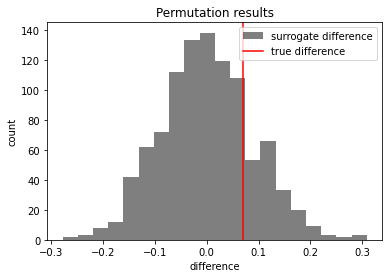

================= Face-encoding =================
true difference: 0.0786010787947573
p-value: 0.199


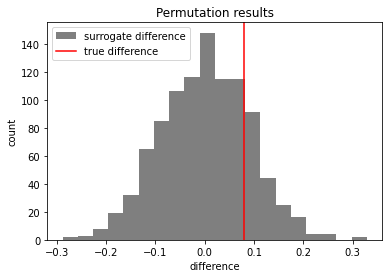

In [9]:
# run permutation test - total alpha power

print("================= Word-encoding =================")
p_value, diff, distribution = run_permutation_test(df_w, variable='alpha_bp', condition='epoch', n_iterations=1000)

print("================= Face-encoding =================")
p_value, diff, distribution = run_permutation_test(df_f, variable='alpha_bp', condition='epoch', n_iterations=1000)


================= Word-encoding =================


true difference: 0.17596797002602615
p-value: 0.02


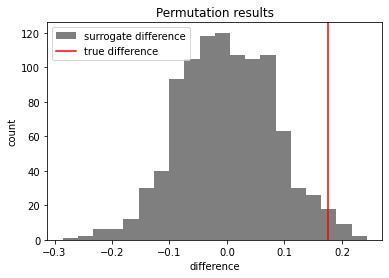

================= Face-encoding =================
true difference: 0.17072371662398345
p-value: 0.025


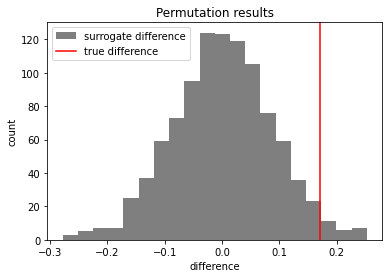

In [10]:
# run permutation test - exponent

print("================= Word-encoding =================")
p_value, diff, distribution = run_permutation_test(df_w, variable='exponent', condition='epoch', n_iterations=1000)

print("================= Face-encoding =================")
p_value, diff, distribution = run_permutation_test(df_f, variable='exponent', condition='epoch', n_iterations=1000)


================= Word-encoding =================


true difference: 0.10364774605788085
p-value: 0.245


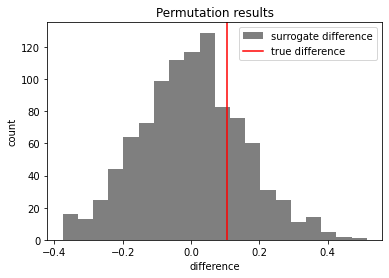

================= Face-encoding =================
true difference: 0.09900179216800264
p-value: 0.258


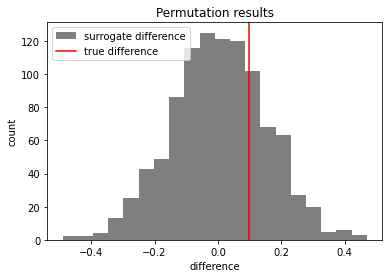

In [11]:
# run permutation test - adjusted alpha power

print("================= Word-encoding =================")
p_value, diff, distribution = run_permutation_test(df_w, variable='alpha_adj', condition='epoch', n_iterations=1000)

print("================= Face-encoding =================")
p_value, diff, distribution = run_permutation_test(df_f, variable='alpha_adj', condition='epoch', n_iterations=1000)


### perform hierarchical bootsrap
level 1: epoch (experimental condition)  
level 2: patient  
level 3: channel

#############################################
word-encoding
#############################################

Variable: exponent
p-value: 0.8137999999999999


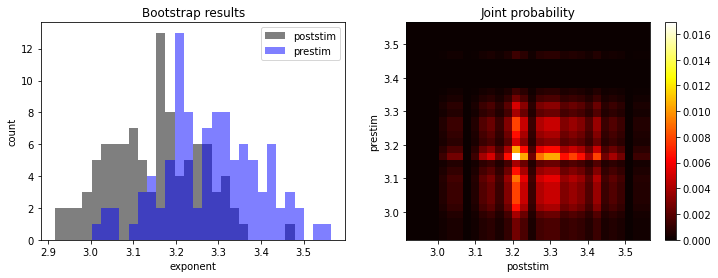


Variable: alpha_bp
p-value: 0.6907000000000001


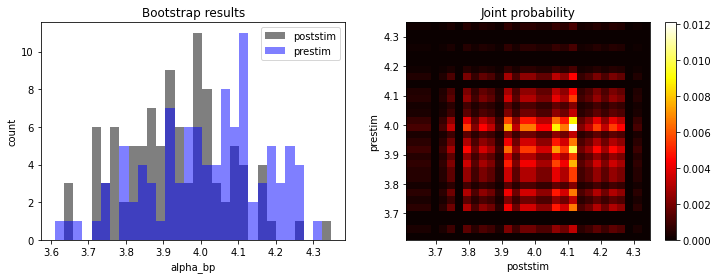


Variable: alpha_adj
p-value: 0.658


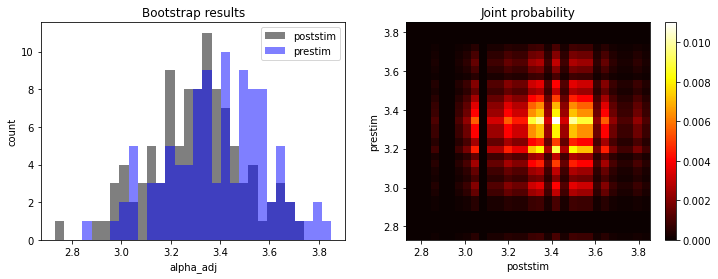

#############################################
face-encoding
#############################################

Variable: exponent
p-value: 0.6413


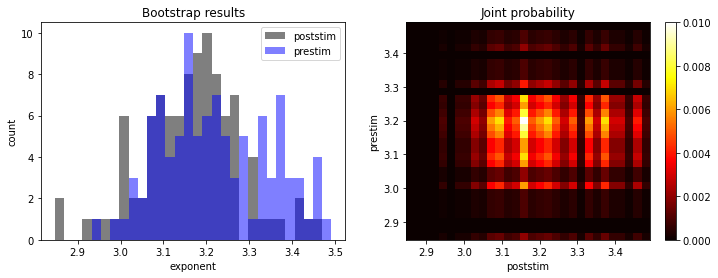


Variable: alpha_bp
p-value: 0.5749000000000001


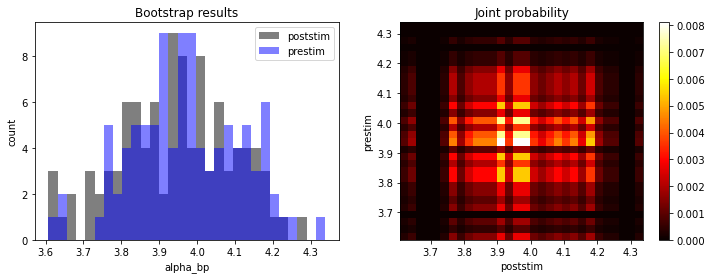


Variable: alpha_adj
p-value: 0.6429


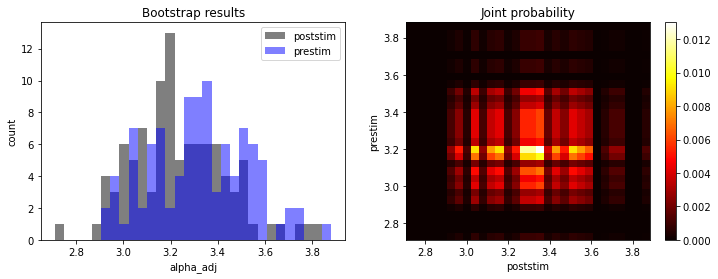

In [13]:
# apply hierarchical bootstrap for each trial type and variable oF interest
for df, material in zip([df_w, df_f],['word-encoding','face-encoding']):
    # display progress
    print("#############################################")
    print(material)
    print("#############################################")

    # drop nan values
    df_r = df.copy()
    df_r = df_r.dropna(subset=['exponent','alpha_bp','alpha_adj'])

    for variable in ['exponent', 'alpha_bp','alpha_adj']:
        # display progress
        print(f"\nVariable: {variable}")

        # apply hierarchical bootstrap
        p_value, joint_prob, bin_edges, distribution_0, distribution_1 = run_hierarchical_bootstrap(df_r, variable, 'epoch', 'patient', 'chan_idx', 100)